# Parte 2 - Uso do LLM

Aqui utilizaremos os dados gerados nas etapas anteriores e um LLM para criar o nosso sistema de perguntas e respostas sobre dados SQL sobre as olímpiadas, e a nossa análise de filosofia dos atletas utilizando RAG

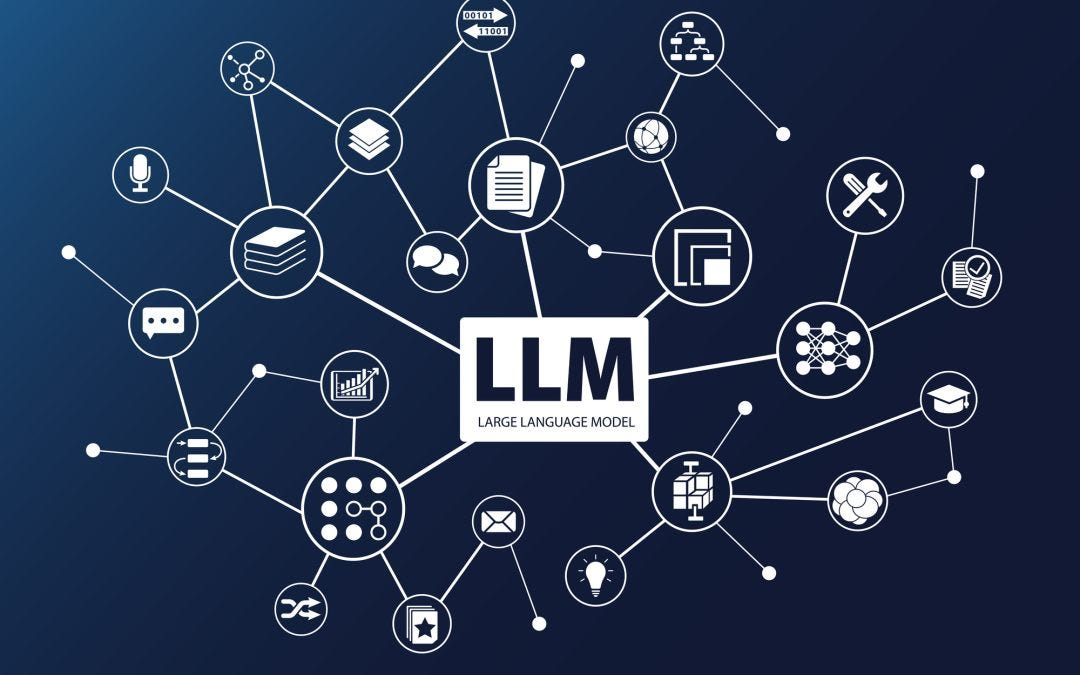

## Bibliotecas

In [1]:
!pip install openai -q U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


In [2]:
import openai

Instalação do lanchain na versão 0.2.13

In [3]:
# Instalando o pacote LangChain
#!pip install -qU langchain
!pip install -qU langchain==0.2.13

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.3 MB/s eta 0:00:00


In [4]:
import langchain
print(langchain.__version__)

0.2.13


In [5]:
#Integração com o pacote da OpenAI
!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.1 MB/s eta 0:00:00


In [6]:
!pip install -qU langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.7 MB/s eta 0:00:00


In [7]:
!pip install sentence_transformers -q U
!pip install chromadb -q U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.3 MB/s eta 0:00:0

In [8]:
from langchain_community.document_loaders import DataFrameLoader
import pandas as pd
import numpy as np
import chromadb
from chromadb.utils import embedding_functions
from chromadb.utils.batch_utils import create_batches
import uuid

## Sistema de perguntas e respostas sobre dados SQL -  Olímpiadas de 2004 a 2024, com previsão para as olímpiadas de 2024

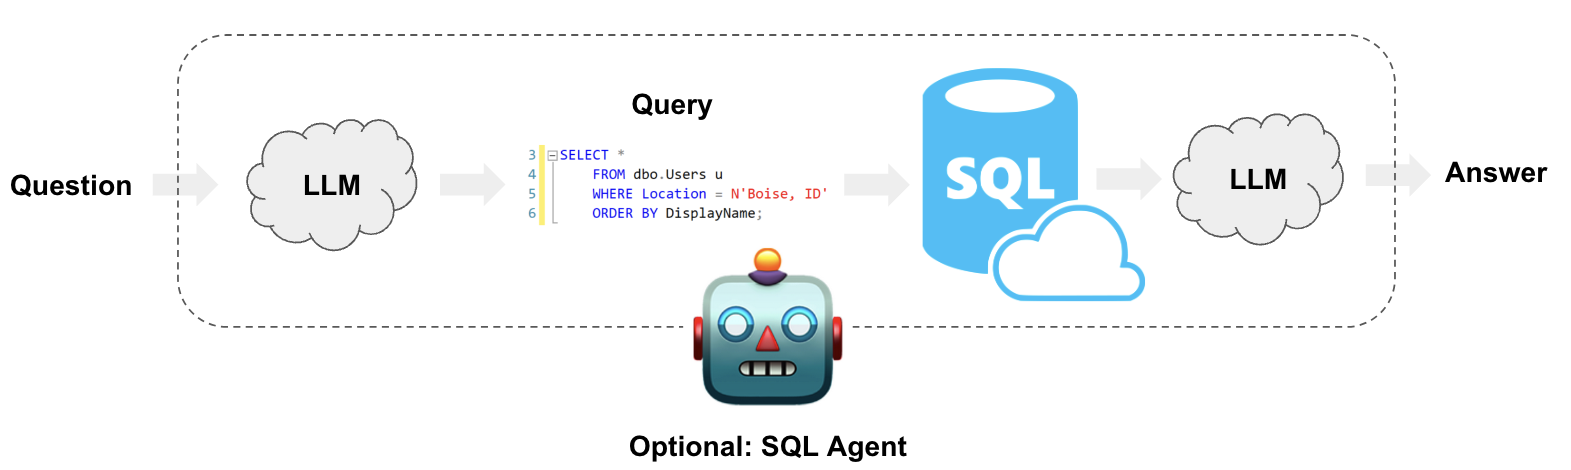

Coletando a API da OpenIA

In [9]:
#Definindo a chave da OpenAI
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


Importanto o dataframe com as informações das olimpíadas

In [10]:
import pandas as pd
df = pd.read_csv('df_olimpiadas_2004_2024_final.csv',sep = ';')

In [11]:
df.drop(columns = {'Unnamed: 0'}, inplace = True)
df.head(2)

,slug_game,country_name,country_3_letter_code,game_year,Qtd_Medalhas_Pais,Qtd_Medalhas_Ouro,Qtd_Medalhas_Prata,Qtd_Medalhas_Bronze,Qtd_Esportes_Distintos,Qtd_Times,Health_Expenditure,Health_Media_Gpd,Culture_Expenditure,Culture_Media_Gpd,Education_Expenditure,Education_Media_Gpd,Predicao_Qtd_Medalhas_Pais
0,paris-2024,United States of America,USA,2024,126,40,44,42,44,264,6.622703e+08,10.24494,1.725794e+07,0.26697,3.618440e+08,5.59752,88.0
1,paris-2024,China,CHN,2024,91,40,27,24,42,232,1.173621e+08,2.89510,1.702467e+07,0.41997,1.465649e+08,3.61548,54.0


In [12]:
import sqlite3
import pandas as pd
from sqlalchemy import create_engine, text
from langchain_community.utilities import SQLDatabase

Criando um banco de dados SQL para armazenar o dataframe com informa

In [13]:
#Criar uma conexão SQLite persistente e carregar o DataFrame
engine = create_engine('sqlite:///meu_banco_de_dados.db', echo=False)
df.to_sql('olimpiadas_2004_2024', con=engine, index=False, if_exists='replace')

# Passo 3: Verificar as tabelas criadas
with engine.connect() as conn:
    result = conn.execute(text("SELECT name FROM sqlite_master WHERE type='table';"))
    tables = result.fetchall()
    print("Tabelas no banco de dados:", tables)

# Passo 4: Conectar ao banco de dados persistente com SQLDatabase
db = SQLDatabase.from_uri("sqlite:///meu_banco_de_dados.db")

# Passo 5: Verificar o dialeto do banco de dados
print(db.dialect)

Tabelas no banco de dados: [('olimpiadas_2004_2024',)]
sqlite


Importando o modelo

In [14]:
from langchain_openai import ChatOpenAI

modelo = ChatOpenAI(model="gpt-3.5-turbo-1106") # gpt-3.5-turbo-1106

Testando a requisição

In [15]:
from langchain.chains import create_sql_query_chain

chain = create_sql_query_chain(modelo, db)

resposta = chain.invoke({"question": "Quantas medalhas o Brasil ganhou em 2004 e em 2020"})

In [16]:
resposta

"SELECT country_name, game_year, Qtd_Medalhas_Pais\nFROM olimpiadas_2004_2024\nWHERE country_name = 'Brazil' AND (game_year = 2004 OR game_year = 2020)"

In [17]:
chain.get_prompts()[0].pretty_print()

You are a SQLite expert. Given an input question, first create a syntactically correct SQLite query to run, then look at the results of the query and return the answer to the input question.
Unless the user specifies in the question a specific number of examples to obtain, query for at most 5 results using the LIMIT clause as per SQLite. You can order the results to return the most informative data in the database.
Never query for all columns from a table. You must query only the columns that are needed to answer the question. Wrap each column name in double quotes (") to denote them as delimited identifiers.
Pay attention to use only the column names you can see in the tables below. Be careful to not query for columns that do not exist. Also, pay attention to which column is in which table.
Pay attention to use date('now') function to get the current date, if the question involves "today".

Use the following format:

Question: Question here
SQLQuery: SQL Query to run
SQLResult: Result

In [18]:
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool

modelo = ChatOpenAI(model="gpt-3.5-turbo-1106")

execute_query = QuerySQLDataBaseTool(db=db)
write_query = create_sql_query_chain(modelo, db)

chain = write_query | execute_query

chain.invoke({"question": "Quantas medalhas o Brazil ganhou em 2004"})

'[(10,)]'

Definindo o prompt final para o modelo

In [27]:
from operator import itemgetter

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough

prompt = PromptTemplate.from_template(
    """Dada a seguinte pergunta do usuário, a consulta SQL correspondente e o resultado SQL, responda à pergunta do usuário.
       Lembre-se, a unidade de medida para dinheiro é dólares.
       A coluna 'Qtd_Medalhas_Pais' se refere ao valor exato da quantidade de medalhas que o país ganhou.
       A coluna 'Predicao_Qtd_Medalhas_Pais' se refere ao valor previsto, que é aproximado.
       Só possúimos previsão de medalhas para as olimpíadas de paris em 2024. A previsão foi feita utilizando uma regressão linear.
       Se a pergunta for sobre os investimentos que um país fez em uma determinada olimpíada, informe que é um dado aproximado.
       Caso não possua dados para responder a pergunta, não responda, e informe que não possui dados suficientes.



Questão: {question}
SQL Query: {query}
SQL Result: {result}
Resposta: """
)

modelo = ChatOpenAI(model="gpt-3.5-turbo-1106")

chain = (
    RunnablePassthrough.assign(query = write_query).assign(
        result = itemgetter("query") | execute_query
    )
    | prompt
    | modelo
    | StrOutputParser()
)

chain.invoke({"question": "Quantas medalhas o Brasil ganhou em 2020?"})

'O Brasil ganhou 20 medalhas em 2020.'

In [52]:
chain.invoke({"question": "Quantas medalhas o Brasil ganhou em 2024?"})

'O Brasil ganhou 20 medalhas em 2024, sendo 3 de ouro, 7 de prata e 10 de bronze.'

In [29]:
chain.invoke({"question": "Qual era a previsão de medalhas do Brasil 2024?"})

'A previsão de medalhas do Brasil para as Olimpíadas de Paris em 2024 era de aproximadamente 18 medalhas.'

In [22]:
chain.invoke({"question": "Qual era a previsão de medalhas do Brasil ganhou em 2024?"})

'A previsão de medalhas que o Brasil ganharia em 2024 era de 18 medalhas.'

In [23]:
chain.invoke({"question": "Qual foi o investimento em educação do Brasil no ciclo olímpico de Athenas?"})

'O investimento em educação do Brasil no ciclo olímpico de Athenas foi de aproximadamente 5.354.821,67 dólares.'

In [30]:
chain.invoke({"question": "Qual era a previsão de medalhas do Brasil em 2020?"})

'Não possuímos previsão de medalhas para o Brasil em 2020, pois só temos previsão para as olimpíadas de Paris em 2024. Desculpe, não possuímos dados suficientes para responder a sua pergunta.'

In [31]:
df[df.country_name == 'Brazil']

,slug_game,country_name,country_3_letter_code,game_year,Qtd_Medalhas_Pais,Qtd_Medalhas_Ouro,Qtd_Medalhas_Prata,Qtd_Medalhas_Bronze,Qtd_Esportes_Distintos,Qtd_Times,Health_Expenditure,Health_Media_Gpd,Culture_Expenditure,Culture_Media_Gpd,Education_Expenditure,Education_Media_Gpd,Predicao_Qtd_Medalhas_Pais
19,paris-2024,Brazil,BRA,2024,20,3,7,10,37,162,2.510185e+07,6.278540,808161.948,0.202140,1.975652e+07,4.941550,18.0
99,athens-2004,Brazil,BRA,2004,10,5,2,3,27,121,4.825355e+06,3.996087,196295.730,0.165483,5.354822e+06,4.425163,NaN
176,beijing-2008,Brazil,BRA,2008,17,3,4,10,31,145,1.314578e+07,4.426260,779198.622,0.257277,1.270975e+07,4.266890,NaN
264,london-2012,Brazil,BRA,2012,17,3,5,9,33,141,2.600006e+07,4.744557,1620510.125,0.292973,2.753457e+07,4.998727,NaN
348,rio-2016,Brazil,BRA,2016,19,7,6,6,40,249,2.754073e+07,4.778003,1773136.734,0.302037,2.933750e+07,5.085223,NaN
434,sydney-2000,Brazil,BRA,2000,12,0,6,6,27,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,tokyo-2020,Brazil,BRA,2020,20,6,6,8,32,140,2.776475e+07,5.147007,1123854.244,0.208330,2.812546e+07,5.211600,NaN


In [32]:
chain.invoke({"question": "Qual país ganhou mais medalhas de ouro nas olímpiadas de Paris?"})

'O país que ganhou mais medalhas de ouro nas Olimpíadas de Paris foi os Estados Unidos da América, com um total de 40 medalhas de ouro.'

In [33]:
chain.invoke({"question": "Qual foi o top 3 de países com mais medalhas em 2024?"})

'Os países com mais medalhas em 2024 foram:\n1. Estados Unidos da América - 126 medalhas\n2. China - 91 medalhas\n3. Grã-Bretanha - 65 medalhas'

In [34]:
chain.invoke({"question": "Qual foi o top 10 de países com mais medalhas em 2024?"})

'O top 10 de países com mais medalhas em 2024 foi:\n1. Estados Unidos da América - 126 medalhas\n2. China - 91 medalhas\n3. Grã-Bretanha - 65 medalhas\n4. França - 64 medalhas\n5. Austrália - 53 medalhas\n6. Japão - 45 medalhas\n7. Itália - 40 medalhas\n8. Holanda - 34 medalhas\n9. Alemanha - 33 medalhas\n10. Coreia do Sul - 32 medalhas'

In [38]:
chain.invoke({"question": "Em qual posição o Brasil ficou entre os medalhistas nas olimpíadas de 2024?"})

'O Brasil ficou em 12º lugar entre os medalhistas nas olimpíadas de 2024.'

## Análise de filosofia dos atletas das olimpíadas de 2024, utilizando RAG

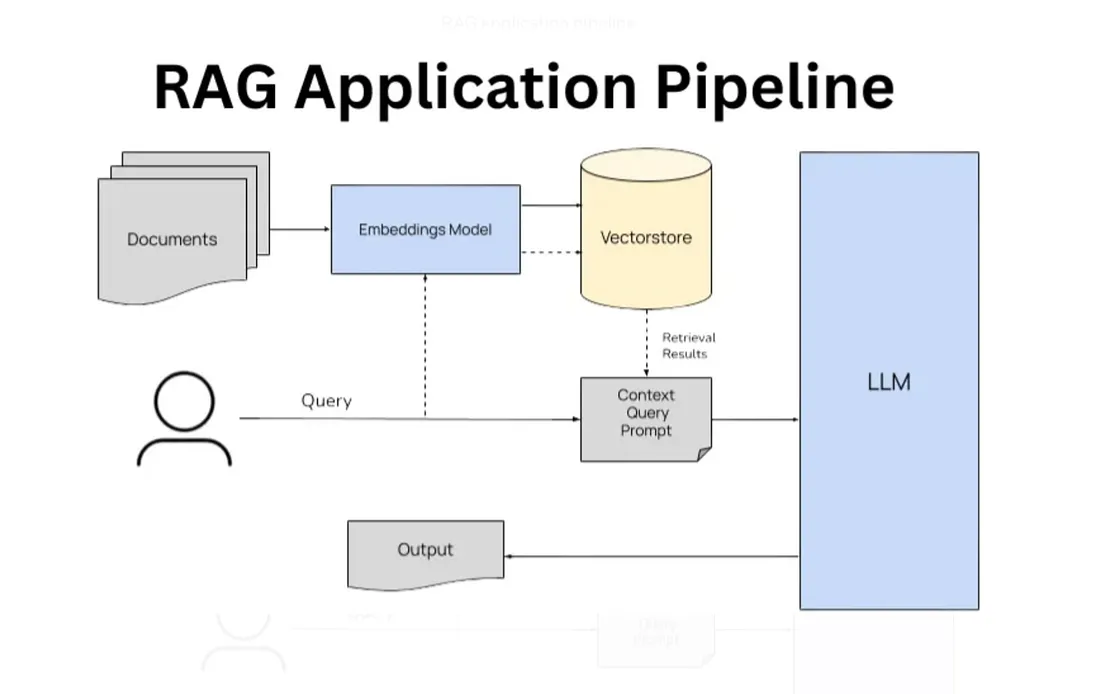

In [39]:
df_filosofia_paris = pd.read_csv('df_filosofia_paris_2024.csv',sep = ';')

In [40]:
df_filosofia_paris.head()

,Unnamed: 0,name,country_code,country,hobbies,education,hero,influence,philosophy,slug_game,game_year
0,0,ALEKSANYAN Artur,ARM,Armenia,Playing and watching football,Graduated from Shirak State University (Gyumri...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",paris-2024,2024
1,14,DIOSDADO Nuria,MEX,Mexico,"Spending time with friends, playing the piano,...",Studied Business Administration at Anahuac Uni...,"Spanish artistic swimmer Gemma Mengual, 2008 O...",Her parents,"""Let everything you do be guided by your passi...",paris-2024,2024
2,34,LOPEZ Jesus Tonatiu,MEX,Mexico,"Reading, listening to music, puzzles",Sport Studies at University of Sonora (Hermosi...,His parents,His family,"""Quit now and every battle will have been in v...",paris-2024,2024
3,58,MORENO Alexa,MEX,Mexico,"Anime, karaoke",Architecture at University of the Valley of Me...,"Artistic gymnast Oksana Chusovitina (UZB), eig...",Her parents,"""Keep going and if you fall, learn why you fel...",paris-2024,2024
4,83,RODRIGUEZ Gabriela,MEX,Mexico,"Working out, hiking",Studied Clinical Psychology at the Monterrey I...,"Shooter Ennio Falco (ITA), 1996 Olympic skeet ...","Her coach, Pietro Genga (ITA). ""He has taught ...","""Small actions, big results. Everything is on ...",paris-2024,2024


In [41]:
df_filosofia_paris.tail()

,Unnamed: 0,name,country_code,country,hobbies,education,hero,influence,philosophy,slug_game,game_year
457,10724,NAJAFOV Yashar,AZE,Azerbaijan,"Walking, driving",Azerbaijan State Academy of Physical Education...,"Swimmer Michael Phelps (USA), 28-time Olympic ...","""My family, especially my mother."" (Athlete, 2...","""Those who want it, win - no excuses."" (Athlet...",paris-2024,2024
458,10823,JOHNSON Cheswill,RSA,South Africa,"Playing video games, drawing, watching films, ...",Logistics - University of Johannesburg (RSA),South African long jumpers Ruswahl Samaai and ...,Diamond Athletic Club owners John and Maria Di...,"""I've always believed in myself. My mindset ha...",paris-2024,2024
459,10850,HRIBAR Lucija,SLO,Slovenia,"Bike riding, roller skating",Studies coaching,"Artistic gymnast Rebeca Andrade (BRA), two-tim...","""100% my coach, because she always stands by m...","""Where there's a will, there's a way. You can ...",paris-2024,2024
460,10878,KAUZER Peter,SLO,Slovenia,"Snowboarding, surfing, cross-country skiing, b...","University of Sport, Ljubljana (SLO)","Boxer Muhammad Ali, born Cassius Clay (USA), f...",His father,"""I'm a perfectionist, and I'm going for gold.""...",paris-2024,2024
461,11054,NIJJAR Jasneet,CAN,Canada,"Hiking, outdoor activities, reading, spending ...",Graduated in 2023 with a Bachelor of Science d...,"Sprinter Allyson Felix (USA), 11-time Olympic ...",Her parents for their sacrifices in leaving In...,"""Today's pain will become tomorrow's strength....",paris-2024,2024


In [42]:
df_filosofia_paris = df_filosofia_paris[['name','country','philosophy']]

In [43]:
loader = DataFrameLoader(df_filosofia_paris, page_content_column="philosophy")
docs = loader.load()

Criação do banco de dados vetorial com as filosofias transformadas em embeddings

In [44]:
# Configurações do ChromaDB
CHROMA_DATA_PATH = "./chroma_data/"
EMBED_MODEL = "all-MiniLM-L6-v2"
COLLECTION_NAME = "philosophy_comments"

# Iniciar o cliente do ChromaDB com armazenamento persistente
client = chromadb.PersistentClient(path=CHROMA_DATA_PATH)

# Descomente se a coleção já existir e você quiser deletá-la
# client.delete_collection(COLLECTION_NAME)

# Configurar a função de embeddings usando o modelo escolhido
embedding_func = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name=EMBED_MODEL
)

# Criar uma coleção de documentos no ChromaDB
collection = client.create_collection(
    name=COLLECTION_NAME,
    embedding_function=embedding_func,
    metadata={"hnsw:space": "cosine"},
)

# Criar lotes (batches) com UUID aleatório para cada documento
batches = create_batches(
    api=client,
    ids=[f"{uuid.uuid4()}" for i in range(len(docs))],
    documents=[doc.page_content for doc in docs],
    metadatas=[{'name': docs[k].metadata['name'], 'country': docs[k].metadata['country']} for k in range(len(docs))]
)

# Adicionar os lotes à coleção no ChromaDB
for batch in batches:
    print(f"Adding batch of size {len(batch[0])}")
    collection.add(ids=batch[0],
                   documents=batch[3],
                   metadatas=batch[2])

print("Concluído")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Adding batch of size 462
Concluído


Testando a recuperação de informação com o RAG

In [45]:
# test data
results = collection.query(
    query_texts=["Qual a filosofia dos atletas da china?"],
    n_results=10,
    include=['documents','metadatas']

)

# convert results to nice dataframe
results_df = pd.DataFrame(results['documents']).transpose()
results_df.columns = ['Comment']

results_df

,Comment
0,"""Testa e cuore."" (Head and heart). (Athlete, 2..."
1,"""Quality before quantity."" (philipp-buhl.de)"
2,"""Wahda-Wahda"" (One by one in Maltese) (Athlete..."
3,"""Keep going until you can't."" (hangzhou2022.co..."
4,"""Stay present."" </p><p>""Every flower must grow..."
5,"""Persevere to the end bravely, even if the sto..."
6,"""Talent is part of it, but working hard is mor..."
7,"""Don't push the river."" (myInfo)"
8,"""The good thing about swimming is that you hav..."
9,"""Don't settle."" (intlgymnast.com, 5 July 2024)"


Criação de uma função para construir o prompt do modelo

In [46]:
# helper function for prompt construction
def construct_prompt(docs: dict, question: str) -> str:
    # convert the docs into a numbered list of comments
    results_df = pd.DataFrame(docs['documents']).transpose()
    results_df.columns = ['Comment']
    results_df['ComNum'] = [str(i) for i in range(1, len(results_df) + 1)]
    results_df['Numbered Comments'] = results_df['ComNum'] + '. ' + results_df['Comment']

    # Collect the results in a context
    context = "\n".join([r for r in results_df['Numbered Comments']])

    # construct prompt
    prompt = f"""
        Responda a seguinte questão: {question}.
        Refira-se apenas à seguinte lista numerada de comentários de atletas ao responder: {context}.
        Verifique cuidadosamente cada comentário numerado e ignore-o se não contiver linguagem que corresponda de forma próxima à pergunta original.
        Forneça o máximo de informações possível no resumo, sujeito às condições já mencionadas.
        Comece sua resposta com 'Baseado nas respostas dos atletas selecionados', e tente dar uma ideia das opiniões majoritárias e minoritárias sobre o tópico, mas apenas se houver uma opinião majoritária identificável.'
        Se não houver informações suficientes para fornecer uma opinião resumida, indique que este é o caso.
        """

    return prompt

In [47]:
import getpass
openai_base_url = 'https://api.openai.com/v1'
openai_api_key = getpass.getpass("Digite sua chave da OpenAI: ")

Digite sua chave da OpenAI: ··········


Criação do pipeline completo, que receberá a questão, o modelo, a coleção de documentos, irá recuperar as filosofias de acordo com a pergunta (RAG), e gerar a resposta

In [48]:
# packages
from dotenv import load_dotenv
import openai
import os

# load env variables
load_dotenv()
# openai_base_url = os.getenv('OPENAI_BASE_URL')
# openai_api_key = os.getenv("LLM_TOKEN")

# chromadb location
CHROMA_DATA_PATH = "./chroma_data/"
collection_db="philosophy_comments"

# Initialize an OpenAI client
client = openai.OpenAI(api_key=openai_api_key, base_url=openai_base_url)

# initialize a chroma client
chroma_client = chromadb.PersistentClient(path=CHROMA_DATA_PATH)

# function to execute RAG pipeline using GPT-4
def ask_question_openai(question:str, client = client,
                        collection: chromadb.PersistentClient() = collection_db,
                        n_docs:int = 10, filters: dict ={}) -> str:

    # Find close documents in chromadb
    collection = chroma_client.get_collection(collection)
    results = collection.query(
       query_texts=[question],
       n_results=n_docs,
       where=filters
    )

    prompt = construct_prompt(results, question)

    # send prompt to GPT-4
    chat_completion = client.chat.completions.create(
        messages=[{
                "role": "user",
                "content": prompt,
        }],
        model="gpt-3.5-turbo-1106",
    )

    # display response
    print(chat_completion.choices[0].message.content)

Perguntas

In [49]:
ask_question_openai("Qual a filosofia dos atletas?")

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:02<00:00, 34.3MiB/s]


Baseado nas respostas dos atletas selecionados, podemos concluir que a filosofia dos atletas é focada na prática constante, no foco e na determinação para alcançar a vitória. Além disso, eles enfatizam a importância de lidar com as dificuldades e de manter a paixão pelo que fazem. Também é mencionada a necessidade de manter a calma e não se preocupar com pequenos detalhes. No entanto, não há uma opinião majoritária identificável sobre a filosofia dos atletas.


In [50]:
ask_question_openai("Qual o resumo da filosofia dos atletas do Canada?")

Baseado nas respostas dos atletas selecionados, a filosofia dos atletas do Canadá é enfatizar a importância do trabalho árduo e da prática constante ("No pain, no gain", "Practise, practise, practise"). Eles também enfatizam a importância de manter a calma e focar no presente, sem deixar que as limitações impeçam o progresso ("Do not let what you can not do interfere with what you can do", "Stay present"). Além disso, os atletas destacam a importância do amor pelo esporte e da mentalidade positiva ("Love it, do it", "Do what you love and love what you do"). Não há uma opinião majoritária clara, mas os atletas parecem valorizar a disciplina, a resiliência e a paixão pelo que fazem.


In [51]:
ask_question_openai("Qual o resumo da filosofia dos atletas do Brasil?")

Baseado nas respostas dos atletas selecionados, a filosofia dos atletas do Brasil parece incluir elementos de perseverança, dedicação, amor pelo esporte, amizade e foco na qualidade. Alguns atletas destacam a importância de continuar praticando e nunca desistir, enquanto outros enfatizam a importância de manter o coração e a mente engajados. Além disso, há menção à importância de respirar e do trabalho árduo durante os treinos. No entanto, não há uma opinião majoritária clara sobre o tópico, já que cada atleta expressa sua própria filosofia pessoal em relação ao esporte.
